<a href="https://colab.research.google.com/github/Sagaust/DH-Computational-Methodologies/blob/main/Augustine_First_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 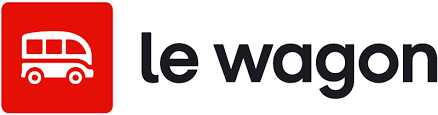

# First ML model

## Features engineering

### Data discovery

a) Download [`customer_segmentation.csv`](https://drive.google.com/file/d/1l2PxzOHeXYXT8t-TQdGAq2R_646_CKbU/view?usp=sharing) and load it into a `df` variable.

Describe data.

b) What type of machine learning problem it is ?
Identify features and target variables.

c) What do you think of `customer_id` column as feature? (no code required)

d) Delete `customer_id` column.

e) With `.info()` Dataframe method, determine which column(s) have missing information? Which columns are of type text (object)?

f) Before dealing with missing values, it is always important to check magnitudes of  numeric columns and see if there are any outlier.

With DataFrame `.describe()` method, determine outliers

g) Delete rows with negative `average_price` column. Don't delete null rows, we will replace them with other values later.

Hint:
- use pandas masking techniques techniques
- use `df.average_price.isnull()` to select null rows

### Handle missing values

h) To replace missing values, first make sure that they do not represent a large portion of  data.

Calculate proportion of missing values per column.

Average_price, age, gender and hobbies columns have 5%, 2%, 1% and 90% missing values respectively.

i) What do you think of column `hobbies`? Can it be kept?

j) Delete `hobbies` column

k) Which strategies can you use to replace missing values of `average_price`, `age` and `gender` columns?

l) Replace missing values in the `gender` column with the mode. To do this, look at how to calculate the mode and then analyze the [fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) function of pandas.

m) Replace missing values in the `average_price` and `age` columns with their respective means.

n) Check that `df` doesn't contain any missing value anymore.

### Features / target split

o) Put features in a variable `X` and target column in a variable `y`.

### Encoding

p) Encode `y` with values 0, 1 et 2 with sklearn's [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) function. Check results and display classes.

Note that classes are encoded by alphabetical order.

q) In a new variable `X_dummy`, transform the text of `country` and `gender` columns with sklearn [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder) function.

Display categories.

Note: Add sparse=False as parameter

r) What does this instruction do?

In [ ]:
import numpy as np

dummy_cols = np.concatenate((onehotencoder.categories_[0], onehotencoder.categories_[1]), axis=None)
print(dummy_cols)

['fr' 'it' 'uk' 'female' 'male']


s) Transform `X_dummy` into a DataFrame object with the correct column names using the previous question.

### Normalisation

All our features are now numerical !

We now need to normalize data.

t) In `X_num` variable, normalize values of `average_basket`, `average_price`, `visit_number` and `age` columns. You can use sklearn [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function.

u) Transform `X_num` into a DataFrame with good columns names.

### Join features

v) Group variables `X_dummy` and `X_num` into a `X` DataFrame with correct columns names.

You can use Pandas [concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function.

Display result.

You should obtain:

In [ ]:
X

,fr,it,uk,female,male,average_basket,average_price,visit_number,age
0,0.0,1.0,0.0,1.0,0.0,-0.170249,-1.072076,-0.552283,-0.902260
1,0.0,0.0,1.0,0.0,1.0,0.472694,0.308809,-0.748189,1.085567
2,1.0,0.0,0.0,0.0,1.0,-0.813192,-0.807909,-0.552283,0.886784
3,1.0,0.0,0.0,0.0,1.0,-0.813192,-0.794284,-0.356378,-0.305912
4,1.0,0.0,0.0,0.0,1.0,-0.813192,-0.818506,-0.552283,0.290436
...,...,...,...,...,...,...,...,...,...
8764,0.0,0.0,1.0,0.0,1.0,-0.170249,0.338329,-0.748189,1.184958
8765,0.0,1.0,0.0,0.0,1.0,-0.170249,-0.930783,-0.356378,-1.001651
8766,1.0,0.0,0.0,1.0,0.0,-0.813192,-0.769305,-0.356378,-1.200434
8767,1.0,0.0,0.0,0.0,1.0,-0.813192,-0.914383,-0.356378,0.489219


Congratulations, you just cleaned data.

Data are now ready to be used to build a machine learning algorithm.

w) Summarize here the different steps you have made (as a memo).

## Modelisation

a) Using sklearn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function and `X` and `y`, generate the dataframes `X_train`, `X_test`, `y_train`, `y_test`. The training sample (train) will represent 70% of the initial data.

b) From sklearn, create a model of type [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score) and train it on your training data with `fit` method.

c) Using `my_tree_classifier`'s `score` method , display train and test scores. What do you notice?

### Prediction

d) Download [`customer_segmentation_new.csv`](https://drive.google.com/file/d/1tGMXV9mH8EmPVlwcM-7pN5V2fTRgygsL/view?usp=sharing) in a variable `df_new`. This file contains new customers who do not have been categorized yet.
- Apply same transformations as before to obtain a dataframe `X_new` which will correspond to the transformed version of `df_new`
- From X_new and your previously trained model, predict the `y_predict` vector corresponding to the categorization of each of these new customers


**Warning**: It is important to keep the same transormations as in training. For example, an imputation by the average should be imputed by the same average as in training and not a new average. Similarly for transformations requiring a `fit_transform` step, you only need to use `transform` method. You don’t want to retrain your data.

In [ ]:
y_predict

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1,
       1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,